# Practical Application III: Comparing Classifiers

**Overview**: In this practical application, your goal is to compare the performance of the classifiers we encountered in this section, namely K Nearest Neighbor, Logistic Regression, Decision Trees, and Support Vector Machines.  We will utilize a dataset related to marketing bank products over the telephone.  



### Getting Started

Our dataset comes from the UCI Machine Learning repository [link](https://archive.ics.uci.edu/ml/datasets/bank+marketing).  The data is from a Portugese banking institution and is a collection of the results of multiple marketing campaigns.  We will make use of the article accompanying the dataset [here](CRISP-DM-BANK.pdf) for more information on the data and features.



### Problem 1: Understanding the Data

To gain a better understanding of the data, please read the information provided in the UCI link above, and examine the **Materials and Methods** section of the paper.  How many marketing campaigns does this data represent?

From the article accompanying the dataset:

>The dataset collected is related to 17 campaigns that occurred between May 2008 and November 2010, corresponding to a total of 79354 contacts.

### Problem 2: Read in the Data

Use pandas to read in the dataset `bank-additional-full.csv` and assign to a meaningful variable name.

In [276]:
import pandas as pd

In [277]:
df = pd.read_csv('./data/bank-additional-full.csv', sep = ';')

In [278]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


### Problem 3: Understanding the Features


Examine the data description below, and determine if any of the features are missing values or need to be coerced to a different data type.


```
Input variables:
# bank client data:
1 - age (numeric)
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5 - default: has credit in default? (categorical: 'no','yes','unknown')
6 - housing: has housing loan? (categorical: 'no','yes','unknown')
7 - loan: has personal loan? (categorical: 'no','yes','unknown')
# related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone')
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
# other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14 - previous: number of contacts performed before this campaign and for this client (numeric)
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
# social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
17 - cons.price.idx: consumer price index - monthly indicator (numeric)
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')
```



In [280]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [281]:
df.isna().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [282]:
df["pdays"].value_counts(normalize=True) * 100

pdays
999    96.321744
3       1.065844
6       1.000291
4       0.286491
9       0.155385
2       0.148101
7       0.145673
12      0.140818
10      0.126250
5       0.111683
13      0.087404
11      0.067981
1       0.063125
15      0.058269
14      0.048558
8       0.043702
0       0.036418
16      0.026707
17      0.019423
18      0.016995
22      0.007284
19      0.007284
21      0.004856
25      0.002428
26      0.002428
27      0.002428
20      0.002428
Name: proportion, dtype: float64

#### Observations
* No missing data in any columns
* `duration` feature will be dropped as we are building a predictive model
* We'll use Target encoding for categorical features and apply standard scaling for numeric features

### Problem 4: Understanding the Task

After examining the description and data, your goal now is to clearly state the *Business Objective* of the task.  State the objective below.

The first-order business goals are to:
* offer attractive long-term deposit applications with good interest rates, in particular by using directed marketing campaigns
* deliver a reduction in costs and time

The first-order business goals can be achieved by:
* increased efficiency through fewer contacts with the customers while ensuring a certain success (clients subscribing the deposit) rate

The accompanying article summarizes the business goal well, as:
> to increase efficiency of directed campaigns for long-term deposit subscriptions by reducing the number of contacts to do

### Problem 5: Engineering Features

Now that you understand your business objective, we will build a basic model to get started.  Before we can do this, we must work to encode the data.  Using just the bank information features, prepare the features and target column for modeling with appropriate encoding and transformations.

In [287]:
# Drop columns `duration` and `y`
X = df.drop(columns=["duration", "y"])

In [288]:
# Transform pdays into a binary value, setting all values of 999 to True and all else to False
X["pdays"] = X["pdays"] == 999

In [289]:
# Target column
y = df["y"] == "yes"

Note: Encoding of data is in the pipeline defined in `make_pipeline` below.

### Problem 6: Train/Test Split

With your data prepared, split it into a train and test set.

In [292]:
from sklearn.model_selection import train_test_split
# set `stratify=y` to ensure distribution of classes in train and test sets is similar to distribution in original dataset
# this is important given the imbalance of classes in the original dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

### Problem 7: A Baseline Model

Before we build our first model, we want to establish a baseline.  What is the baseline performance that our classifier should aim to beat?

The baseline classifier is a constant model that always returns the majority class
* the accuracy of this model is the rate of occurance of the majority class

In [295]:
y_train.value_counts(normalize=True)

y
False    0.887346
True     0.112654
Name: proportion, dtype: float64

In [296]:
import numpy as np
baseline_performance = np.max(y_train.value_counts(normalize=True))
baseline_performance

0.8873458288821987

### Problem 8: A Simple Model

Use Logistic Regression to build a basic model on your data.  

In [298]:
from sklearn.preprocessing import StandardScaler, TargetEncoder
from sklearn.compose import make_column_transformer, make_column_selector

# Apply TargetEncoding to Categorical columns and StanardScaler to remaining
xformer = make_column_transformer(
    (
        TargetEncoder(smooth="auto", random_state=42, target_type="binary"),
        make_column_selector(dtype_include=object),
    ),
    remainder=StandardScaler(),
    verbose_feature_names_out=False,
)

In [299]:
def make_pipeline(classifier_name: str = ""):
    """
    Returns an unfitted pipeline consisting of the following named steps
    1. xformer: a column transformer
        - performs OHE for object features
        - and standard scaler for all others
    2. classifier: a classifier using the named classifier
    """
    kwargs = {} if classifier_name == "KNeighborsClassifier" else {"random_state": 42}
    classifier = eval(classifier_name)(**kwargs)
    return Pipeline(
        [
            ("xformer", xformer),
            ("classifier", classifier),
        ]
    )

In [300]:
from sklearn.linear_model import LogisticRegression, Perceptron
from sklearn.pipeline import Pipeline

import warnings
warnings.filterwarnings("ignore")

lgr = make_pipeline(classifier_name="LogisticRegression").fit(X_train, y_train)

### Problem 9: Score the Model

What is the accuracy of your model?

In [302]:
from sklearn.metrics import (
    accuracy_score,
    balanced_accuracy_score,
    recall_score,
    precision_score,
    f1_score,
    roc_auc_score,
)

def make_scores_dict(estimator, prefix: str, X: pd.DataFrame, y: pd.Series):
    metrics_list = [
        "Accuracy",
        "Balanced Accuracy",
        "Precision",
        "Recall",
        "f1",
        "ROC_AUC",
    ]
    y_pred = estimator.predict(X)
    return {
        " ".join([prefix, metric]): round(
            eval(metric.lower().replace(" ", "_") + "_score")(y, y_pred) * 100.0,
            2,
        )
        for metric in metrics_list
    }

In [303]:
from time import time
def fit_and_time(classifier_name: str, features: list = X_train.columns):
    tic = time()
    classifier_pipeline = make_pipeline(classifier_name).fit(X_train[features], y_train)

    train_scores = make_scores_dict(
        classifier_pipeline, "Train", X_train[features], y_train
    )

    test_scores = make_scores_dict(
        classifier_pipeline, "Test", X_test[features], y_test
    )

    return (
        {
            "Model": classifier_name,
            "Train and Score Time": time() - tic,
        }
        | train_scores
        | test_scores
    )

In [304]:
pd.DataFrame([fit_and_time(classifier_name="LogisticRegression")])

,Model,Train and Score Time,Train Accuracy,Train Balanced Accuracy,Train Precision,Train Recall,Train f1,Train ROC_AUC,Test Accuracy,Test Balanced Accuracy,Test Precision,Test Recall,Test f1,Test ROC_AUC
0,LogisticRegression,0.62882,89.82,59.82,64.78,21.09,31.82,59.82,89.93,59.37,68.14,19.91,30.82,59.37


#### Observations

* The testing accuracy of the Linear Regression Model is higher than the base model (89.93 vs 88.73). 
* However, ROC_AUC score is low which is better measure of accuracy with imbalanced data.

### Problem 10: Model Comparisons

Now, we aim to compare the performance of the Logistic Regression model to our KNN algorithm, Decision Tree, and SVM models.  Using the default settings for each of the models, fit and score each.  Also, be sure to compare the fit time of each of the models.  Present your findings in a `DataFrame` similar to that below:

| Model | Train Time | Train Accuracy | Test Accuracy |
| ----- | ---------- | -------------  | -----------   |
|     |    |.     |.     |

In [307]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

classifier_names = [
    "KNeighborsClassifier",
    "DecisionTreeClassifier",
    "LogisticRegression",
    "SVC",
]

In [308]:
results_df = pd.DataFrame(
    [fit_and_time(classifier_name) for classifier_name in classifier_names]
)

results_df

,Model,Train and Score Time,Train Accuracy,Train Balanced Accuracy,Train Precision,Train Recall,Train f1,Train ROC_AUC,Test Accuracy,Test Balanced Accuracy,Test Precision,Test Recall,Test f1,Test ROC_AUC
0,KNeighborsClassifier,2.947325,91.28,68.15,70.87,38.30,49.73,68.15,89.16,62.96,53.48,29.14,37.72,62.96
1,DecisionTreeClassifier,0.661254,88.22,72.87,47.94,53.05,50.36,72.87,83.73,62.95,30.97,36.12,33.35,62.95
2,LogisticRegression,0.621656,89.82,59.82,64.78,21.09,31.82,59.82,89.93,59.37,68.14,19.91,30.82,59.37
3,SVC,82.673774,89.97,59.35,69.21,19.83,30.82,59.35,90.00,58.65,72.26,18.19,29.06,58.65


| Model | Train Time | Train Accuracy | Test Accuracy |
| ----- | ---------- | -------------  | -----------   |
| KNeighborsClassifier |  3.053425  |  68.15   |  62.96   |
| DecisionTreeClassifier |  0.674753  |  72.87   |  62.95   |
| LogisticRegression |  0.609272  |  59.82   |  59.37   |
| SVC |  79.613209  |  59.35   |  58.65   |

#### Observations:
* LogisticRegression and SVC are the fastest and slowest models respectively.
* Test Accuracy is nearly similar with KNeighborsClassifier having the best score.

### Problem 11: Improving the Model

Now that we have some basic models on the board, we want to try to improve these.  Below, we list a few things to explore in this pursuit.

- More feature engineering and exploration.  For example, should we keep the gender feature?  Why or why not?
- Hyperparameter tuning and grid search.  All of our models have additional hyperparameters to tune and explore.  For example the number of neighbors in KNN or the maximum depth of a Decision Tree.  
- Adjust your performance metric

#### Feature Importance with Permutation Importance

We will be using the logistic regression as the foundational model to feature importance.

This will help us determine what feature are more imporant to predict the output.


In [313]:
estimator = lgr

In [314]:
from sklearn.inspection import permutation_importance

result = permutation_importance(
    estimator, X_test, y_test, n_repeats=10, random_state=42
)
feature_importance = pd.DataFrame(
    {
        "Feature": X.columns,
        "Importance": result.importances_mean,
        "Standard Deviation": result.importances_std,
    }
).sort_values("Importance", ascending=True)
feature_importance

,Feature,Importance,Standard Deviation
1,job,-0.000379,0.000477
0,age,-0.000350,0.000139
2,marital,-0.000330,0.000282
3,education,-0.000320,0.000304
4,default,-0.000146,0.000302
13,poutcome,-0.000117,0.000085
10,campaign,-0.000097,0.000464
9,day_of_week,-0.000068,0.000045
8,month,-0.000068,0.000480
6,loan,0.000000,0.000000


Text(0.5, 1.0, 'Permutation Importance with Standard Deviation')

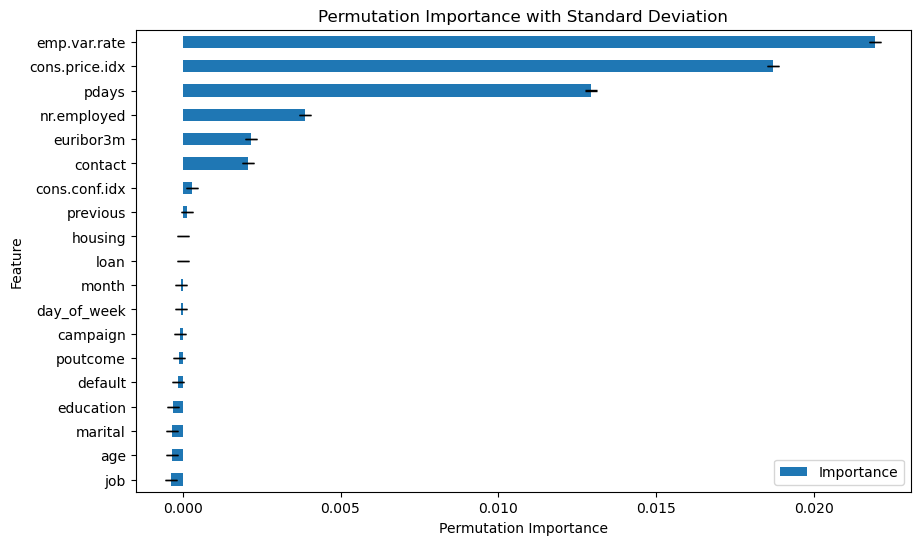

In [315]:
ax = feature_importance.plot(
    x="Feature",
    y="Importance",
    kind="barh",
    figsize=(10, 6),
    yerr="Standard Deviation",
    capsize=4,
)
ax.set_xlabel("Permutation Importance")
ax.set_title("Permutation Importance with Standard Deviation")

In [316]:
best_features = list(feature_importance.tail(6)["Feature"])
best_features

['contact',
 'euribor3m',
 'nr.employed',
 'pdays',
 'cons.price.idx',
 'emp.var.rate']

#### Hyperparameter Estimation with Grid Search

In [318]:
classifier_param_grids = {
    "KNeighborsClassifier": {
        "classifier__n_neighbors": range(1, 5),
    },
    "DecisionTreeClassifier": {
        "classifier__random_state": [42],
        "classifier__max_depth": range(1, 5),
        "classifier__class_weight": [None, "balanced"],
    },
    "LogisticRegression": {
        "classifier__penalty": ["l1", "l2"],
        "classifier__C": np.logspace(start=-5, stop=5, num=11),
    },
    "SVC": {
        "classifier__max_iter": [5000],
        "classifier__kernel": ["rbf", "poly"],
    },
}

In [319]:
from sklearn.model_selection import GridSearchCV

def grid_search_fit_and_time(
    classifier_name: str = "",
    param_grid: dict = {},
    scoring: str = "",
    features: list = X_train.columns,
):
    classifier_pipeline = make_pipeline(classifier_name=classifier_name)

    tic = time()
    grid = GridSearchCV(
        estimator=classifier_pipeline,
        param_grid=param_grid,
        scoring=scoring,
        cv=5,
    ).fit(X_train[features], y_train)
    grid_search_time = time() - tic

    tic = time()
    train_scores = make_scores_dict(
        grid.best_estimator_, "Train", X_train[features], y_train
    )

    test_scores = make_scores_dict(
        grid.best_estimator_, "Test", X_test[features], y_test
    )
    score_time = time() - tic

    return (
        {
            "Model": classifier_name,
            "Average Grid Search Time": grid_search_time
            / len(grid.cv_results_["params"]),
            "Score Time": score_time,
        }
        | train_scores
        | test_scores
        | {
            "Best Params": grid.best_params_,
            "Best Estimator": grid.best_estimator_,
        }
    )

In [320]:
results_gridded_df = pd.DataFrame(
    [
        grid_search_fit_and_time(
            classifier_name=classifier_name,
            param_grid=classifier_param_grids[classifier_name],
            scoring="balanced_accuracy",
            features=best_features,
        )
        for classifier_name in classifier_param_grids.keys()
    ]
)

results_gridded_df

,Model,Average Grid Search Time,Score Time,Train Accuracy,Train Balanced Accuracy,Train Precision,Train Recall,Train f1,Train ROC_AUC,Test Accuracy,Test Balanced Accuracy,Test Precision,Test Recall,Test f1,Test ROC_AUC,Best Params,Best Estimator
0,KNeighborsClassifier,3.574966,5.111242,90.07,66.12,60.14,35.20,44.41,66.12,89.16,63.30,53.38,29.91,38.34,63.30,{'classifier__n_neighbors': 3},"(ColumnTransformer(remainder=StandardScaler(),..."
1,DecisionTreeClassifier,0.303448,0.109194,83.16,73.33,35.52,60.63,44.79,73.33,83.60,74.39,36.63,62.50,46.19,74.39,"{'classifier__class_weight': 'balanced', 'clas...","(ColumnTransformer(remainder=StandardScaler(),..."
2,LogisticRegression,0.305797,0.112488,89.92,59.01,69.06,19.11,29.93,59.01,90.04,58.56,73.76,17.93,28.85,58.56,"{'classifier__C': 0.001, 'classifier__penalty'...","(ColumnTransformer(remainder=StandardScaler(),..."
3,SVC,57.104084,34.186945,89.92,59.01,69.06,19.11,29.93,59.01,90.04,58.56,73.76,17.93,28.85,58.56,"{'classifier__kernel': 'rbf', 'classifier__max...","(ColumnTransformer(remainder=StandardScaler(),..."


#### Adjust your performance metric
As stated earlier, given the imbalance of classes in the original dataset, we are going to be using `Test ROC_AUC`
as the measure for performance.

### Summary of findings

#### Choice of Metric
Given the imbalance of classes in the original dataset, we have used `Test ROC_AUC` as the performance metric to compare models.

#### Choice of Features

Using logistic regression as the base foundational model, we used permutation importance to identify important features.

* We reduced the feature space to 6.
* This improves fit and preduction times while maintaining the performance when compared to using all the features.

#### Choice of Classifiers

##### KNeighborsClassifier
* This was the second least performant model.
* The excess time to fit and score didn't result in a better accuracy compared to our baseline model.

##### DecisionTreeClassifier
* This model has better fit and score times comparable to LogisticRegression.
* This model has the best score compared to all other models making it the **best overall choice**.

##### LogisticRegression
* This model has the best fit and score times compared to all other models.
* Accuracy is lower compared to our baseline model.

##### SVC
* This took the longest time to fit and score.
* Score is comparable to LogisticRegression, which is less than the baseline model.
